Paul Renner <br>
University of Jena, Chair of remote sensing <br>
supervisors: Dr. Marcel Urban and John Truckenbrodt<br>
GEO 402 and GEO 419 Python Code for Land Cover Change (LCC) Detection using Sentinel 1 Data <br>

Execute with Jupyter Notebook (anaconda3) <br>


### New Conda Environment and Install Packages

Requirements: Geopandas, GDAL 2.4.3 for spatialist and Plotly must be installed under conda.  <br>
Import the conda environment to Anaconda Navigator given in GitHub


### Import Libraries

In [2]:
from datetime import datetime
import fiona
import gdal, gdalnumeric, ogr, osr
import geopandas as gpd
import glob
#import matplotlib.pyplot as plt
#import matplotlib.pylab as plb
import numpy as np
import os, sys
import pandas as pd
#import plotly
import plotly.graph_objects as go
from spatialist import Raster, Vector
import warnings
warnings.filterwarnings("ignore") #not best practice but clean for Runtime Warnings
gdal.UseExceptions()

### File-Directory and Classes
Change your directroy and classes for the ROIs here:

Sentinel 1 Data

In [6]:
#Tower
s1vv_dir = 'D:/Dokumente/Uni/Jena/GEO_402/Grundlagendaten/Sentinel_1_Stack/S1_A_VV_stack_mpumalanga_full_study_site_50m'
s1vh_dir = 'D:/Dokumente/Uni/Jena/GEO_402/Grundlagendaten/Sentinel_1_Stack/S1_A_VH_stack_mpumalanga_full_study_site_50m'
#Surface
#s1vv_dir = 'C:/Users/paulr/Documents/FSU_Jena/GEO_402/Grundlagendaten/Sentinel_1_Stack/S1_A_VV_stack_mpumalanga_full_study_site_50m'
#s1vh_dir = 'C:/Users/paulr/Documents/FSU_Jena/GEO_402/Grundlagendaten/Sentinel_1_Stack/S1_A_VH_stack_mpumalanga_full_study_site_50m'

Polygone ROI (Region of Intrest)

In [7]:
#Tower
allroi = 'D:/Dokumente/Uni/Jena/GEO_402/Grundlagendaten/ROI/testsites.shp'
#Surface
#allroi = 'C:/Users/paulr/Documents/FSU_Jena/GEO_402/Output/testsites.shp'

In [ ]:
#count for ROIs in ID field
roifirst = 1
roilast = 15
#ID field in table of content of the shape data
idfield = Objectid

Change Classes

### Import Data | Check Import
Sentinel 1 Data Time Series HDR File

In [8]:
s1vv = gdal.Open(s1vv_dir)
s1vh = gdal.Open(s1vh_dir)
print ('VV Szenes: ', s1vv.RasterCount)
print ('VH Szenes: ', s1vh.RasterCount)


VV Szenes:  270
VH Szenes:  270


### Sentinel 1 Data Extract
Reading Sentinel 1 Dates VV as array with datetime objects

In [14]:
rasvv= Raster(s1vv_dir)
vvdatestr = '\n'.join(rasvv.bandnames)
vvdatelist = vvdatestr.split(sep='\n')
prefix1 = 'S1A__IW___A_'
prefix2 = 'S1B__IW___A_'
suffix = '_VV_grd_mli_norm_geo_db'
vvdatelist = [x.strip(prefix1) for x in vvdatelist]
vvdatelist = [x.strip(prefix2) for x in vvdatelist]
vvdatelist = [x.strip(suffix) for x in vvdatelist]
vvdates = [datetime.strptime(d, '%Y%m%dT%H%M%S') for d in vvdatelist]
#vvdates = np.asarray(vvdates)
#print (vvdates)
print ('Reading datetime VV done!')

Reading datetime VV done!


Reading Sentinel 1 Dates VH as array with datetime objects

In [15]:
rasvh= Raster(s1vh_dir)
vhdatestr = '\n'.join(rasvh.bandnames)
vhdatelist = vhdatestr.split(sep='\n')
prefix1 = 'S1A__IW___A_'
prefix2 = 'S1B__IW___A_'
suffix = '_VH_grd_mli_norm_geo_db'
vhdatelist = [x.strip(prefix1) for x in vhdatelist]
vhdatelist = [x.strip(prefix2) for x in vhdatelist]
vhdatelist = [x.strip(suffix) for x in vhdatelist]
vhdates = [datetime.strptime(d, '%Y%m%dT%H%M%S') for d in vhdatelist]
#vhdates = np.asarray(vhdates)
#print (vhdates)
print ('Reading datetime VH done!')

Reading datetime VH done!


Reading Backscatter (VV) from defined ROIs

In [19]:
vvmeans = []
for objectid in range(1, 16):
    print(objectid)
    query = "objectid={}".format(objectid)
    with Vector(allroi)[query] as vec:
        #print(vec)
        with Raster(s1vv_dir)[vec] as rasvv:
            arr = rasvv.array()
            #print(arr.shape)
    vvmean = [np.nanmean(arr[:, :, x]) for x in range(0, arr.shape[2])]
    vvmeans.append(vvmean)
print ('Reading mean VV for all ROI done!')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Reading mean VV for all ROI done!


Reading Backscatter (VH) from defined ROIs

In [20]:
vhmeans = []
for objectid in range(1, 16):
    print(objectid)
    query = "objectid={}".format(objectid)
    with Vector(allroi)[query] as vec:
        #print(vec)
        with Raster(s1vh_dir)[vec] as rasvh:
            arr = rasvh.array()
            #print(arr.shape)
    vhmean = [np.nanmean(arr[:, :, x]) for x in range(0, arr.shape[2])]
    vhmeans.append(vhmean)
print ('Reading mean VV for all ROI done!')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Reading mean VV for all ROI done!


### Classes Plot ROI with Backscatter information

In [40]:
import plotly.graph_objects as go

for count in range (0, 15):
    headline = 'VV und VH Rückstreuung im Untersuchungsgebiet '+ str(count+1)
    dataname = 'Backscatter_'+ str(count+1) + '.html'
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=vvdates,
        y=vvmeans[count],
        connectgaps=True,
        name="VV",
        mode='lines'
    ))
    fig.add_trace(go.Scatter(
        x=vhdates,
        y=vhmeans[count],
        connectgaps=True,
        name="VH",
        mode='lines'
    ))
    fig.update_layout(
        title_text=headline,
        xaxis_title='',
        yaxis_title='Rückstreuung in dB'
        )
    fig.show()
    #plotly.offline.plot(fig, filename = dataname)

# TESTZONE

reading raster with nodata values was a big issue at the beginning

In [7]:
#date format for array
from datetime import datetime
bandname1 = 'S1A__IW___A_20150313T163757_VV_grd_mli_norm_geo_db'
print (bandname1)


date1 = datetime.strptime(bandname1, "S1A__IW___A_%Y%m%dT%H%M%S_VV_grd_mli_norm_geo_db")
print("date1 =", date1)


S1A__IW___A_20150313T163757_VV_grd_mli_norm_geo_db
date1 = 2015-03-13 16:37:57


In [8]:
with Raster(s1vv_dir) as rasvv:
vvdatestr = '\n'.join(rasvv.bandnames)
#print (vvdatestr) 
vvdatelist = vvdatestr.split(sep='\n')
prefix1 = 'S1A__IW___A_'
prefix2 = 'S1B__IW___A_'
suffix = '_VV_grd_mli_norm_geo_db'
vvdatelist = [x.strip(prefix1) for x in vvdatelist]
vvdatelist = [x.strip(prefix2) for x in vvdatelist]
vvdatelist = [x.strip(suffix) for x in vvdatelist]
#print (vvdatelist)
vvdates = [datetime.strptime(d, '%Y%m%dT%H%M%S') for d in vvdatelist]
print (vvdates)


    
#vvdatelist
#vvdates = [datetime.strptime(d, '%Y%m%dT%H%M%S_VV_grd_mli_norm_geo_db') for d in vvdatelist]

#problem with S1A and S1B prefix

#vvdate = datetime.strptime(vvdatelist, "S1A__IW___A_%Y%m%dT%H%M%S_VV_grd_mli_norm_geo_db")
#print (vvdates)

IndentationError: expected an indented block (<ipython-input-8-e4ee1986379a>, line 2)

Vorher Shape verschneiden <br>
Schleife für Name(Datum) und dB auslesen und in array schreiben <br>
Berechnung danach durchführen <br>

In [9]:
with Raster(s1vv_dir) as rasvv:
    #print(rasvv)
    print('\n'.join(rasvv.bandnames))
    

S1A__IW___A_20150313T163757_VV_grd_mli_norm_geo_db
S1A__IW___A_20150320T163021_VV_grd_mli_norm_geo_db
S1A__IW___A_20150325T163814_VV_grd_mli_norm_geo_db
S1A__IW___A_20150401T162953_VV_grd_mli_norm_geo_db
S1A__IW___A_20150406T163802_VV_grd_mli_norm_geo_db
S1A__IW___A_20150413T162950_VV_grd_mli_norm_geo_db
S1A__IW___A_20150418T163815_VV_grd_mli_norm_geo_db
S1A__IW___A_20150420T162216_VV_grd_mli_norm_geo_db
S1A__IW___A_20150425T162954_VV_grd_mli_norm_geo_db
S1A__IW___A_20150430T163823_VV_grd_mli_norm_geo_db
S1A__IW___A_20150507T162951_VV_grd_mli_norm_geo_db
S1A__IW___A_20150512T163824_VV_grd_mli_norm_geo_db
S1A__IW___A_20150519T162952_VV_grd_mli_norm_geo_db
S1A__IW___A_20150524T163825_VV_grd_mli_norm_geo_db
S1A__IW___A_20150531T162954_VV_grd_mli_norm_geo_db
S1A__IW___A_20150605T163804_VV_grd_mli_norm_geo_db
S1A__IW___A_20150612T162954_VV_grd_mli_norm_geo_db
S1A__IW___A_20150617T163826_VV_grd_mli_norm_geo_db
S1A__IW___A_20150624T162954_VV_grd_mli_norm_geo_db
S1A__IW___A_20150629T163827_VV_

class      : spatialist Raster object
dimensions : 2506, 3151, 1 (rows, cols, bands)
resolution : 50.0, -50.0 (x, y)
extent     : 247519.715340596, 405069.71534059604, 7121909.46374071, 7247209.46374071 (xmin, xmax, ymin, ymax)
coord. ref.: +proj=utm +zone=36 +south +datum=WGS84 +units=m +no_defs 
data source: C:\Users\paulr\Documents\FSU_Jena\GEO_402\Grundlagendaten\Sentinel_1_Stack\S1_A_VV_stack_mpumalanga_full_study_site_50m


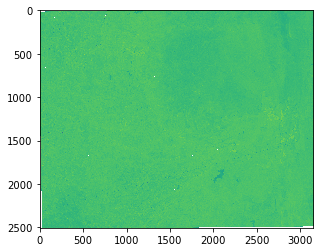

In [10]:
#with Raster(s1vv_dir)[100, 200, :] as ras:
with Raster(s1vv_dir)[:, :, 3] as rasvv:
    print(rasvv)
    #rasvv.write(outname, driver='ENVI')
    mat = rasvv.matrix(1)
plt.imshow(mat)
plt.show()

In [61]:
vvmeans = []
for objectid in range(1, 16):
    print(objectid)
    query = "objectid={}".format(objectid)
    with Vector(allroi)[query] as vec:
        #print(vec)
        with Raster(s1vv_dir)[vec] as rasvv:
            arr = rasvv.array()
            #print(arr.shape)
    vvmean = [np.nanmean(arr[:, :, x]) for x in range(0, arr.shape[2])]
    vvmeans.append(vvmean)

#for objectid in range(0, 15):
#    print(len(vvmeans[objectid]))
#    query = "objectid={}".format(objectid + 1)
    
#print(vvmeans[0])


1


C:\Users\paulr\Anaconda3\envs\LCC\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning:

Mean of empty slice



2
3
4
5
6
7
8
9
10
11
12
13
14
15
[nan, -10.252612, nan, -10.466633, nan, -11.790635, nan, nan, -10.419712, nan, -11.229806, nan, -11.530999, nan, -11.966032, nan, -12.319137, nan, nan, nan, -12.521162, -12.664127, -12.652702, nan, nan, -12.701409, nan, nan, -12.164411, nan, -11.651471, nan, nan, -12.930908, nan, -9.702232, nan, -12.419019, nan, -9.489785, nan, -13.704784, nan, -12.399656, nan, -11.936951, nan, -12.045764, nan, -13.139754, nan, nan, -12.77937, nan, -11.122779, nan, -11.401551, nan, -10.772131, nan, -11.539324, nan, nan, -12.285307, nan, -12.387585, nan, -12.645449, nan, -12.937925, nan, -13.512817, nan, -13.678538, nan, -13.862499, nan, -14.0617, nan, -13.858797, nan, -13.901535, nan, -14.081409, nan, -14.091775, nan, -14.247539, nan, -14.221011, nan, -14.127804, nan, -13.835616, nan, -13.292337, nan, -12.48611, nan, -11.663084, nan, -12.447285, nan, -8.973102, nan, -10.824787, nan, -10.83185, nan, -11.348408, nan, -8.798516, nan, -10.8623705, nan, -11.439887, nan, -12

In [62]:
vhmeans = []
for objectid in range(1, 16):
    print(objectid)
    query = "objectid={}".format(objectid)
    with Vector(allroi)[query] as vec:
        #print(vec)
        with Raster(s1vh_dir)[vec] as rasvh:
            arr = rasvh.array()
            #print(arr.shape)
    vhmean = [np.nanmean(arr[:, :, x]) for x in range(0, arr.shape[2])]
    vhmeans.append(vhmean)

1


C:\Users\paulr\Anaconda3\envs\LCC\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning:

Mean of empty slice



2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [52]:
for objectid in range(1, 15):
    with Vector(allroi)["objectid={}".format(objectid)] as vec:
        #print(vec)
        with Raster(s1vh_dir)[vec] as rasvh:
            arr = rasvh.array()
print(arr.shape)
vhmeans = [np.nanmean(arr[:, :, x]) for x in range(0, arr.shape[2])]
print(vhmeans)

(62, 23, 270)
[nan, nan, nan, -22.685558, nan, -23.23869, nan, nan, -23.527548, nan, -22.754932, nan, -22.730026, nan, -22.850935, nan, -22.580965, nan, -22.664953, nan, -22.481625, -22.620613, -23.043709, nan, nan, -22.938112, nan, nan, -22.963835, nan, -22.914562, nan, nan, -22.945957, nan, -22.961433, nan, -23.279217, nan, -23.26006, nan, -23.18277, nan, -23.071228, nan, -23.374691, nan, -23.288733, nan, -23.194532, nan, nan, -23.30697, nan, -23.044178, nan, -23.31202, nan, -23.176512, nan, -23.430527, nan, nan, -23.456024, nan, -23.246233, nan, -22.975582, nan, -23.175066, nan, -22.955109, nan, -22.861752, nan, -22.775078, nan, -22.511204, nan, -22.511467, nan, -22.36019, nan, -22.105488, nan, -21.706963, nan, -22.426582, nan, -22.586184, nan, -22.726818, nan, -22.386244, nan, -22.695621, nan, -21.86867, nan, -21.422148, nan, -21.339338, nan, -19.171804, nan, -19.524641, nan, -18.814684, nan, -19.188692, nan, -17.25783, nan, -16.59412, nan, -17.702065, nan, -17.665686, nan, -15.995

C:\Users\paulr\Anaconda3\envs\LCC\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

Mean of empty slice



In [24]:
vvmeans = [np.nanmean(arr[:, :, x]) for x in range(0, arr.shape[1])]
print(vvmeans)

[nan, nan, nan, -15.631613, nan, -17.68516, nan, nan, -18.128113, nan, -16.838146, nan, -18.410715, nan, -15.212137, nan, -18.372742, nan, -19.546745, nan, -17.238241, -18.021032, -19.406643]


C:\Users\paulr\Anaconda3\envs\LCC\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning:

Mean of empty slice



In [12]:
np.vstack((vvdates,vvmeans))

array([[datetime.datetime(2015, 3, 13, 16, 37, 57),
        datetime.datetime(2015, 3, 20, 16, 30, 21),
        datetime.datetime(2015, 3, 25, 16, 38, 14),
        datetime.datetime(2015, 4, 1, 16, 29, 53),
        datetime.datetime(2015, 4, 6, 16, 38, 2),
        datetime.datetime(2015, 4, 13, 16, 29, 50),
        datetime.datetime(2015, 4, 18, 16, 38, 15),
        datetime.datetime(2015, 4, 20, 16, 22, 16),
        datetime.datetime(2015, 4, 25, 16, 29, 54),
        datetime.datetime(2015, 4, 30, 16, 38, 23),
        datetime.datetime(2015, 5, 7, 16, 29, 51),
        datetime.datetime(2015, 5, 12, 16, 38, 24),
        datetime.datetime(2015, 5, 19, 16, 29, 52),
        datetime.datetime(2015, 5, 24, 16, 38, 25),
        datetime.datetime(2015, 5, 31, 16, 29, 54),
        datetime.datetime(2015, 6, 5, 16, 38, 4),
        datetime.datetime(2015, 6, 12, 16, 29, 54),
        datetime.datetime(2015, 6, 17, 16, 38, 26),
        datetime.datetime(2015, 6, 24, 16, 29, 54),
        datetime.d

In [80]:
import plotly.graph_objects as go

for count in range (0, 15):

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=vvdates, y=vvmeans[count], connectgaps=True, name="VV", mode='lines'))
    fig.add_trace(go.Scatter(x=vhdates, y=vhmeans[count], connectgaps=True, name="VH", mode='lines'))
    fig.update_layout(title_text="VV und VH Rückstreuung im Untersuchungsgebiet")
    fig.show()

In [71]:
num=1
print ('USG', num + 1)

USG 2


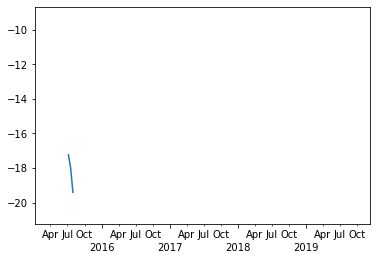

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

t = vvdates
x = vvmeans

fig, ax = plt.subplots()
ax.plot(t,x)

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((1,4,7,10)))

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

plt.show()

In [18]:
#cut roi für plot nötig, nicht für gesamte Erfassung, jedoch sind die Arrays zu groß um damit zu arbeiten


In [25]:
#loop bands and extract date/dB write to array
print ("RASTER BAND COUNT: ", s1vv.RasterCount)
for band in range( s1vv.RasterCount ):
    band += 1
    print ("GETTING BAND: ", band)
    s1vvband = s1vv.GetRasterBand(band)
    if s1vvband is None:
        continue
    
    print (s1vv.GetMetadata()) #get band name? read 13-20 for date (and 22 25 for time) to array

RASTER BAND COUNT:  270
GETTING BAND:  1
{}
GETTING BAND:  2
{}
GETTING BAND:  3
{}
GETTING BAND:  4
{}
GETTING BAND:  5
{}
GETTING BAND:  6
{}
GETTING BAND:  7
{}
GETTING BAND:  8
{}
GETTING BAND:  9
{}
GETTING BAND:  10
{}
GETTING BAND:  11
{}
GETTING BAND:  12
{}
GETTING BAND:  13
{}
GETTING BAND:  14
{}
GETTING BAND:  15
{}
GETTING BAND:  16
{}
GETTING BAND:  17
{}
GETTING BAND:  18
{}
GETTING BAND:  19
{}
GETTING BAND:  20
{}
GETTING BAND:  21
{}
GETTING BAND:  22
{}
GETTING BAND:  23
{}
GETTING BAND:  24
{}
GETTING BAND:  25
{}
GETTING BAND:  26
{}
GETTING BAND:  27
{}
GETTING BAND:  28
{}
GETTING BAND:  29
{}
GETTING BAND:  30
{}
GETTING BAND:  31
{}
GETTING BAND:  32
{}
GETTING BAND:  33
{}
GETTING BAND:  34
{}
GETTING BAND:  35
{}
GETTING BAND:  36
{}
GETTING BAND:  37
{}
GETTING BAND:  38
{}
GETTING BAND:  39
{}
GETTING BAND:  40
{}
GETTING BAND:  41
{}
GETTING BAND:  42
{}
GETTING BAND:  43
{}
GETTING BAND:  44
{}
GETTING BAND:  45
{}
GETTING BAND:  46
{}
GETTING BAND:  47
{

In [6]:
#-99 als noData definieren und in array ausgeben ohne -99
for band in range( s1vv.RasterCount ):
    band += 1
    print ("[ GETTING BAND ]: ", band)
    s1vvband = s1vv.GetRasterBand(band) #read as array, 
    if s1vvband is None:
        continue

    stats = s1vvband.GetStatistics( True, True )
    if stats is None:
        continue

    print ("[ STATS ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % ( \
                stats[0], stats[1], stats[2], stats[3] ))

[ GETTING BAND ]:  1
[ STATS ] =  Minimum=-98.862, Maximum=-0.380, Mean=-11.193, StdDev=6.123
[ GETTING BAND ]:  2
[ STATS ] =  Minimum=-98.870, Maximum=3.743, Mean=-9.611, StdDev=3.096
[ GETTING BAND ]:  3
[ STATS ] =  Minimum=-98.760, Maximum=-0.765, Mean=-10.624, StdDev=6.008
[ GETTING BAND ]:  4
[ STATS ] =  Minimum=-46.345, Maximum=4.321, Mean=-9.359, StdDev=2.253
[ GETTING BAND ]:  5
[ STATS ] =  Minimum=-98.854, Maximum=1.366, Mean=-9.816, StdDev=5.894
[ GETTING BAND ]:  6
[ STATS ] =  Minimum=-45.825, Maximum=3.502, Mean=-10.471, StdDev=2.288
[ GETTING BAND ]:  7
[ STATS ] =  Minimum=-98.863, Maximum=0.318, Mean=-9.775, StdDev=6.152
[ GETTING BAND ]:  8
[ STATS ] =  Minimum=-98.859, Maximum=-6.886, Mean=-11.907, StdDev=10.872
[ GETTING BAND ]:  9
[ STATS ] =  Minimum=-40.586, Maximum=2.975, Mean=-9.758, StdDev=2.233
[ GETTING BAND ]:  10
[ STATS ] =  Minimum=-98.857, Maximum=-1.217, Mean=-10.784, StdDev=6.299
[ GETTING BAND ]:  11
[ STATS ] =  Minimum=-45.792, Maximum=3.677, Me

[ STATS ] =  Minimum=-46.073, Maximum=5.213, Mean=-11.451, StdDev=2.550
[ GETTING BAND ]:  93
[ STATS ] =  Minimum=-98.866, Maximum=-1.611, Mean=-10.747, StdDev=5.963
[ GETTING BAND ]:  94
[ STATS ] =  Minimum=-44.391, Maximum=3.250, Mean=-10.491, StdDev=2.520
[ GETTING BAND ]:  95
[ STATS ] =  Minimum=-98.859, Maximum=0.139, Mean=-9.554, StdDev=6.072
[ GETTING BAND ]:  96
[ STATS ] =  Minimum=-47.377, Maximum=2.004, Mean=-10.726, StdDev=2.281
[ GETTING BAND ]:  97
[ STATS ] =  Minimum=-98.860, Maximum=-0.787, Mean=-10.393, StdDev=5.880
[ GETTING BAND ]:  98
[ STATS ] =  Minimum=-45.050, Maximum=8.249, Mean=-10.567, StdDev=2.209
[ GETTING BAND ]:  99
[ STATS ] =  Minimum=-98.861, Maximum=-1.963, Mean=-11.171, StdDev=5.990
[ GETTING BAND ]:  100
[ STATS ] =  Minimum=-49.608, Maximum=3.292, Mean=-9.722, StdDev=2.188
[ GETTING BAND ]:  101
[ STATS ] =  Minimum=-98.859, Maximum=-3.278, Mean=-11.247, StdDev=5.820
[ GETTING BAND ]:  102
[ STATS ] =  Minimum=-44.296, Maximum=3.117, Mean=-10.5

[ STATS ] =  Minimum=-98.855, Maximum=-1.889, Mean=-12.230, StdDev=6.123
[ GETTING BAND ]:  195
[ STATS ] =  Minimum=-44.205, Maximum=2.337, Mean=-11.049, StdDev=2.310
[ GETTING BAND ]:  196
[ STATS ] =  Minimum=-98.857, Maximum=-0.557, Mean=-12.648, StdDev=6.132
[ GETTING BAND ]:  197
[ STATS ] =  Minimum=-48.345, Maximum=2.519, Mean=-11.160, StdDev=2.333
[ GETTING BAND ]:  198
[ STATS ] =  Minimum=-98.867, Maximum=-1.151, Mean=-12.509, StdDev=6.154
[ GETTING BAND ]:  199
[ STATS ] =  Minimum=-42.256, Maximum=2.030, Mean=-11.219, StdDev=2.360
[ GETTING BAND ]:  200
[ STATS ] =  Minimum=-98.861, Maximum=-2.378, Mean=-12.407, StdDev=6.239
[ GETTING BAND ]:  201
[ STATS ] =  Minimum=-42.181, Maximum=6.648, Mean=-10.948, StdDev=2.440
[ GETTING BAND ]:  202
[ STATS ] =  Minimum=-98.864, Maximum=-3.336, Mean=-12.347, StdDev=6.225
[ GETTING BAND ]:  203
[ STATS ] =  Minimum=-43.772, Maximum=3.706, Mean=-11.030, StdDev=2.373
[ GETTING BAND ]:  204
[ STATS ] =  Minimum=-98.864, Maximum=0.224, 

In [22]:
#-99 als noData definieren und in array ausgeben ohne -99
for band in range (s1vv.RasterCount):
    band += 1
    print ('Getting Band: ', band)
    s1vvband = s1vv.GetRasterBand(band)
    if s1vvband is None:
        continue
    
    s1vvband.SetNoDataValue(ndv),
    stats = s1vvband.GetStatistics( True, True )
    if stats is None:
        continue 
    
    print ("[ STATS ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % ( \
                stats[0], stats[1], stats[2], stats[3] ))

Getting Band:  1
[ STATS ] =  Minimum=-98.882, Maximum=9.929, Mean=-11.063, StdDev=5.746
Getting Band:  2
[ STATS ] =  Minimum=-99.000, Maximum=3.743, Mean=-54.162, StdDev=44.748
Getting Band:  3
[ STATS ] =  Minimum=-99.000, Maximum=-0.765, Mean=-90.426, StdDev=26.225
Getting Band:  4
[ STATS ] =  Minimum=-99.000, Maximum=4.321, Mean=-10.934, StdDev=11.986
Getting Band:  5
[ STATS ] =  Minimum=-99.000, Maximum=1.366, Mean=-90.369, StdDev=26.432
Getting Band:  6
[ STATS ] =  Minimum=-99.000, Maximum=3.502, Mean=-12.026, StdDev=11.849
Getting Band:  7
[ STATS ] =  Minimum=-99.000, Maximum=0.318, Mean=-90.415, StdDev=26.381
Getting Band:  8
[ STATS ] =  Minimum=-99.000, Maximum=-6.886, Mean=-98.778, StdDev=4.428
Getting Band:  9
[ STATS ] =  Minimum=-99.000, Maximum=2.975, Mean=-11.326, StdDev=11.931
Getting Band:  10
[ STATS ] =  Minimum=-99.000, Maximum=-1.217, Mean=-90.784, StdDev=25.709
Getting Band:  11
[ STATS ] =  Minimum=-99.000, Maximum=3.677, Mean=-11.567, StdDev=11.913
Getting

[ STATS ] =  Minimum=-99.000, Maximum=-1.499, Mean=-90.539, StdDev=26.074
Getting Band:  126
[ STATS ] =  Minimum=-99.000, Maximum=3.457, Mean=-11.812, StdDev=11.810
Getting Band:  127
[ STATS ] =  Minimum=-99.000, Maximum=-1.678, Mean=-90.582, StdDev=25.821
Getting Band:  128
[ STATS ] =  Minimum=-99.000, Maximum=3.411, Mean=-12.109, StdDev=11.797
Getting Band:  129
[ STATS ] =  Minimum=-99.000, Maximum=-1.988, Mean=-90.711, StdDev=25.558
Getting Band:  130
[ STATS ] =  Minimum=-99.000, Maximum=3.198, Mean=-12.334, StdDev=11.786
Getting Band:  131
[ STATS ] =  Minimum=-99.000, Maximum=-1.187, Mean=-90.675, StdDev=25.610
Getting Band:  132
[ STATS ] =  Minimum=-99.000, Maximum=2.852, Mean=-12.489, StdDev=11.768
Getting Band:  133
[ STATS ] =  Minimum=-99.000, Maximum=-2.734, Mean=-90.631, StdDev=25.672
Getting Band:  134
[ STATS ] =  Minimum=-99.000, Maximum=2.952, Mean=-12.448, StdDev=11.782
Getting Band:  135
[ STATS ] =  Minimum=-99.000, Maximum=-3.028, Mean=-90.640, StdDev=25.680
G

[ STATS ] =  Minimum=-99.000, Maximum=-1.479, Mean=-90.740, StdDev=25.595
Getting Band:  247
[ STATS ] =  Minimum=-99.000, Maximum=2.468, Mean=-12.237, StdDev=11.795
Getting Band:  248
[ STATS ] =  Minimum=-99.000, Maximum=-1.211, Mean=-90.705, StdDev=25.611
Getting Band:  249
[ STATS ] =  Minimum=-99.000, Maximum=1.456, Mean=-12.363, StdDev=11.796
Getting Band:  250
[ STATS ] =  Minimum=-99.000, Maximum=-2.291, Mean=-90.732, StdDev=25.543
Getting Band:  251
[ STATS ] =  Minimum=-99.000, Maximum=1.388, Mean=-12.559, StdDev=11.775
Getting Band:  252
[ STATS ] =  Minimum=-99.000, Maximum=-2.337, Mean=-90.679, StdDev=25.622
Getting Band:  253
[ STATS ] =  Minimum=-99.000, Maximum=1.282, Mean=-12.639, StdDev=11.774
Getting Band:  254
[ STATS ] =  Minimum=-99.000, Maximum=-2.714, Mean=-90.707, StdDev=25.545
Getting Band:  255
[ STATS ] =  Minimum=-99.000, Maximum=1.298, Mean=-12.504, StdDev=11.799
Getting Band:  256
[ STATS ] =  Minimum=-99.000, Maximum=-2.032, Mean=-90.752, StdDev=25.498
G

In [7]:
# Reproject vector geometry to same projection as raster
    sourceSR = lyr.GetSpatialRef()
    targetSR = osr.SpatialReference()
    targetSR.ImportFromWkt(raster.GetProjectionRef())
    coordTrans = osr.CoordinateTransformation(sourceSR,targetSR)
    feat = lyr.GetNextFeature()
    geom = feat.GetGeometryRef()
    geom.Transform(coordTrans)

IndentationError: unexpected indent (<ipython-input-7-9326bd1395be>, line 2)

In [25]:
band = s1vv.GetRasterBand(1)
type(band)
gdal.GetDataTypeName(band.DataType)
# Compute statistics if needed
if band.GetMinimum() is None or band.GetMaximum()is None:
    band.ComputeStatistics(0)
    print("Statistics computed.")

# Fetch metadata for the band
band.GetMetadata()

# Print only selected metadata:
print ("[ NO DATA VALUE ] = ", band.GetNoDataValue()) # none
print ("[ MIN ] = ", band.GetMinimum())
print ("[ MAX ] = ", band.GetMaximum())

[ NO DATA VALUE ] =  -99.0
[ MIN ] =  -98.881851196289
[ MAX ] =  9.9288997650146


In [26]:
# Read raster data as numeric array from GDAL Dataset
rasterArray = s1vv.ReadAsArray()

In [27]:
#Check the datatype of variables
type(rasterArray)

numpy.ndarray

In [29]:
type(s1vv)

osgeo.gdal.Dataset

In [30]:
rasterArray.min()

-99.0625

In [31]:
# Get nodata value from the GDAL band object
nodata = band.GetNoDataValue()

#Create a masked array for making calculations without nodata values
rasterArray = np.ma.masked_equal(rasterArray, nodata)
type(rasterArray)

# Check again array statistics
rasterArray.min()

KeyboardInterrupt: 

In [27]:
# register all of the drivers
gdal.AllRegister()

# get image size
rows = s1vv.RasterYSize
cols = s1vv.RasterXSize
bands = s1vv.RasterCount

# Set NoData Value
band = s1vv.GetRasterBand(1)
ndv = -99
band.SetNoDataValue(ndv)

# Get Statistics
stats = band.ComputeStatistics(0)
print (stats)

# read in band as array
bandList = []
band.GetNoDataValue()
data = band.ReadAsArray(0, 0, cols, rows)
print (data)


[-98.88185119628906, 9.928899765014648, -11.063243125788851, 5.746020183711076]
[[-99. -99. -99. ... -99. -99. -99.]
 [-99. -99. -99. ... -99. -99. -99.]
 [-99. -99. -99. ... -99. -99. -99.]
 ...
 [-99. -99. -99. ... -99. -99. -99.]
 [-99. -99. -99. ... -99. -99. -99.]
 [-99. -99. -99. ... -99. -99. -99.]]


In [28]:
band = s1vv.GetRasterBand(1)
type(band)
gdal.GetDataTypeName(band.DataType)
# Compute statistics if needed
if band.GetMinimum() is None or band.GetMaximum()is None:
    band.ComputeStatistics(0)
    print("Statistics computed.")

# Fetch metadata for the band
band.GetMetadata()

# Print only selected metadata:
print ("[ NO DATA VALUE ] = ", band.GetNoDataValue()) # none
print ("[ MIN ] = ", band.GetMinimum())
print ("[ MAX ] = ", band.GetMaximum())

[ NO DATA VALUE ] =  -99.0
[ MIN ] =  -98.881851196289
[ MAX ] =  9.9288997650146


In [9]:
img = s1vh

In [10]:

raster_1 = img.GetRasterBand(1).ReadAsArray() # change the number passed to GetRasterBand() to 
where_are_NaNs = np.isnan(raster_1)           # read rasters from different bands
raster_1[where_are_NaNs] = 0

raster_2 = img.GetRasterBand(78).ReadAsArray() #must pass a valid band number to GetRasterBand()
where_are_NaNs = np.isnan(raster_2)
raster_2[where_are_NaNs] = 0

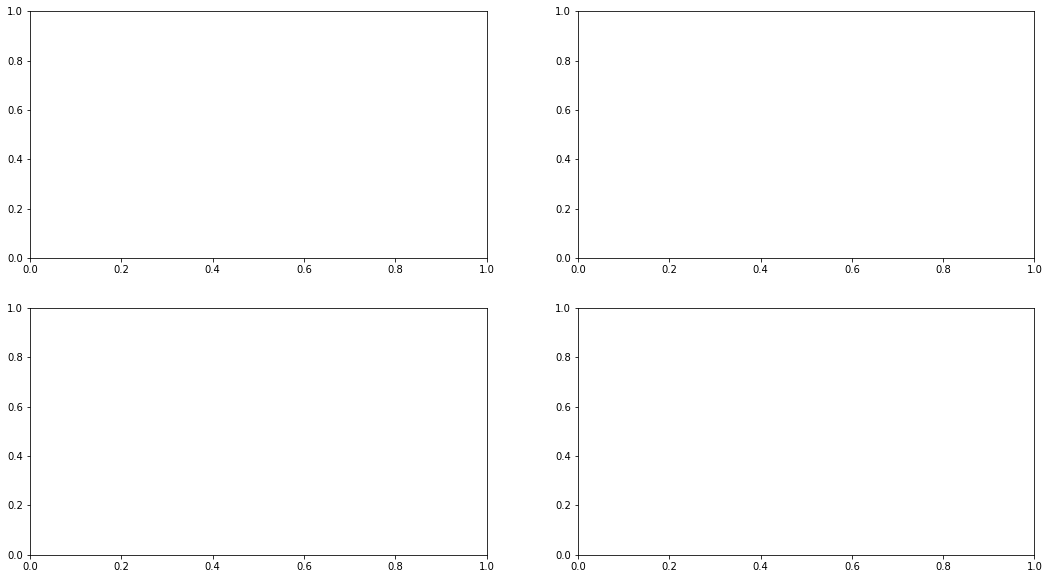

In [11]:
fig = plb.figure(figsize=(18,10)) # Initialize figure with a size
ax1 = fig.add_subplot(221)  # 221 determines: 2 rows, 2 plots, first plot
ax2 = fig.add_subplot(222)  # 222 determines: 2 rows, 2 plots, second plot
ax3 = fig.add_subplot(223)  # 223 determines: 2 rows, 2 plots, third plot
ax4 = fig.add_subplot(224)  # 224 determines: 2 rows, 2 plots, fourth plot
plt.rcParams.update({'font.size': 14})

In [ ]:
"""
Created on Wed Aug 12 21:33:20 2015

@author: rutgerhofste

This script will replace values in a raster and save the result in geotiff format

"""

from osgeo import gdal 
import numpy as np

firstrun = 1


def readFile(filename):
    filehandle = gdal.Open(filename)
    band1 = filehandle.GetRasterBand(1)
    geotransform = filehandle.GetGeoTransform()
    geoproj = filehandle.GetProjection()
    Z = band1.ReadAsArray()
    xsize = filehandle.RasterXSize
    ysize = filehandle.RasterYSize
    return xsize,ysize,geotransform,geoproj,Z

def writeFile(filename,geotransform,geoprojection,data):
    (x,y) = data.shape
    format = "GTiff"
    driver = gdal.GetDriverByName(format)
    # you can change the dataformat but be sure to be able to store negative values including -9999
    dst_datatype = gdal.GDT_Float32
    dst_ds = driver.Create(filename,y,x,1,dst_datatype)
    dst_ds.GetRasterBand(1).WriteArray(data)
    dst_ds.SetGeoTransform(geotransform)
    dst_ds.SetProjection(geoprojection)
    dst_ds.GetRasterBand(1).SetNoDataValue(-9999)
    return 1



pathname = "/yourpathhere/filename.tif"
writefilename = "/youroutputpathhere/filename.tif"


if firstrun == 1 :
    [xsize,ysize,geotransform,geoproj,Z] = readFile(pathname)


# Set large negative values to -9999
Z[Z<=100]= -9999
dst_ds.GetRasterBand(1).SetNoDataValue(-9999)


writeFile(writefilename,geotransform,geoproj,Z)


In [30]:
for count in range (0, 15):
    headline = "VV und VH Rückstreuung im Untersuchungsgebiet "+ str(count+1)
    print (headline)

VV und VH Rückstreuung im Untersuchungsgebiet 1
VV und VH Rückstreuung im Untersuchungsgebiet 2
VV und VH Rückstreuung im Untersuchungsgebiet 3
VV und VH Rückstreuung im Untersuchungsgebiet 4
VV und VH Rückstreuung im Untersuchungsgebiet 5
VV und VH Rückstreuung im Untersuchungsgebiet 6
VV und VH Rückstreuung im Untersuchungsgebiet 7
VV und VH Rückstreuung im Untersuchungsgebiet 8
VV und VH Rückstreuung im Untersuchungsgebiet 9
VV und VH Rückstreuung im Untersuchungsgebiet 10
VV und VH Rückstreuung im Untersuchungsgebiet 11
VV und VH Rückstreuung im Untersuchungsgebiet 12
VV und VH Rückstreuung im Untersuchungsgebiet 13
VV und VH Rückstreuung im Untersuchungsgebiet 14
VV und VH Rückstreuung im Untersuchungsgebiet 15
